In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
def show_gray(img,title="Image"):
    """Display a grayscale image using matplotlib."""
    if img is None:
        raise ValueError("Image is None. check the image path.")
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.title(title)
    plt.show()
    

In [3]:
def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [4]:
# image reading.
image_path="D:\Python project\Python Project for my understanding\images.jpg"
img=cv2.imread(image_path)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

shape(h,w): (168, 300)
Data type: uint8


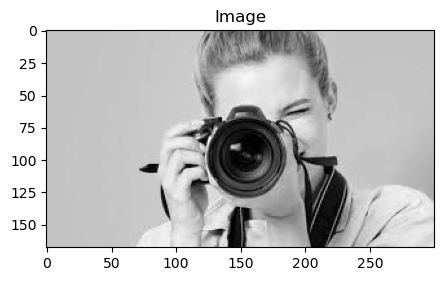

In [5]:
print("shape(h,w):",img_gray.shape)
print("Data type:", img_gray.dtype)
show_gray(img_gray)

In [6]:
# blur the image 
blur_box=cv2.blur(img_gray,(5,5))
blur_gaussian=cv2.GaussianBlur(img_gray,(5,5),sigmaX=1.0)
blur_median=cv2.medianBlur(img_gray,5)


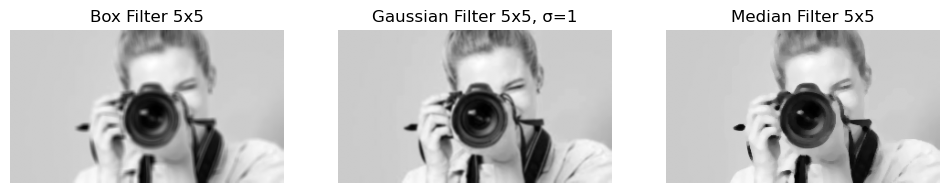

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(blur_box, cmap='gray')
plt.title('Box Filter 5x5')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_gaussian, cmap='gray')
plt.title('Gaussian Filter 5x5, σ=1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_median, cmap='gray')
plt.title('Median Filter 5x5')
plt.axis('off')

plt.show()


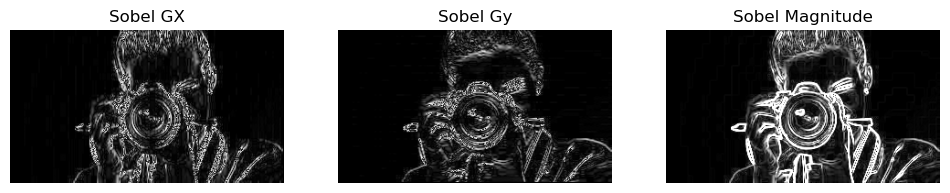

In [15]:
Gx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=3)
Gy=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=3)
G_mag=np.sqrt(Gx**2+Gy**2)
G_mag=np.uint8(np.clip(G_mag,0,255))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np.uint8(np.absolute(Gx)),cmap='gray')
plt.title('Sobel GX')
plt.axis('Off')

plt.subplot(1, 3, 2)
plt.imshow(np.uint8(np.absolute(Gy)), cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(G_mag, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.show()

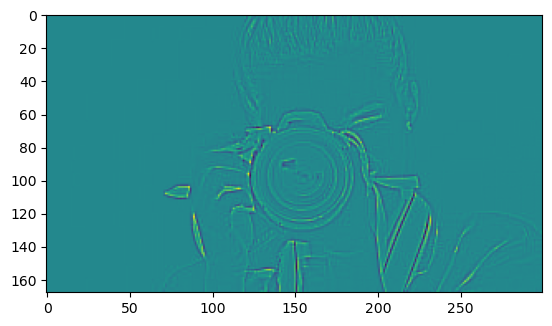

In [17]:
lap=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
plt.imshow(lap)

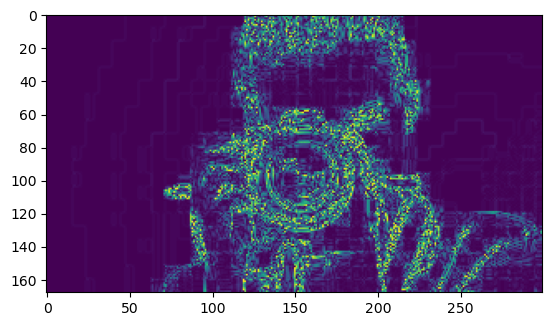

In [19]:
laps_abs=np.uint8(np.absolute(lap))
plt.imshow(laps_abs)

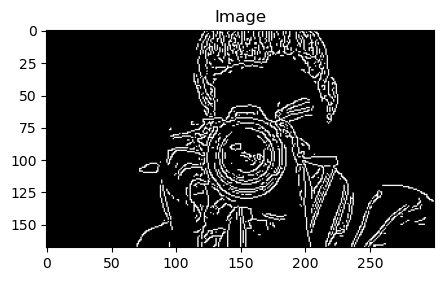

In [22]:
low_threshold=100
high_threshold=110
edges_canny=cv2.Canny(img_gray,low_threshold,high_threshold)
show_gray(edges_canny)

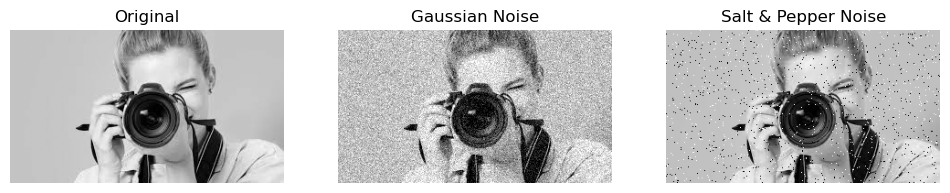

In [26]:
def add_gaussian_noise(img,mean=0,sigma=20):
    img_float=img.astype(np.float32)
    noise=np.random.normal(mean,sigma,img.shape).astype(np.float32)
    noisy=img_float+noise
    noisy=np.clip(noisy,0,255).astype(np.uint8)
    return noisy
def add_salt_pepper_noise(img,amount=0.02,s_vs_p=0.50):
    noisy=img.copy()
    num_pixels=img.size
    num_salt = int(amount * num_pixels * s_vs_p)
    num_pepper = int(amount * num_pixels * (1.0 - s_vs_p))
    coords = (np.random.randint(0, img.shape[0], num_salt),
              np.random.randint(0, img.shape[1], num_salt))
    noisy[coords] = 255

    # Pepper (black) noise
    coords = (np.random.randint(0, img.shape[0], num_pepper),
              np.random.randint(0, img.shape[1], num_pepper))
    noisy[coords] = 0

    return noisy

noisy_gaussian = add_gaussian_noise(img_gray, sigma=25)
noisy_sp = add_salt_pepper_noise(img_gray, amount=0.03)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_sp, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.show()


In [34]:
def sobel_edges(img):
    Gx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    Gy=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    G_mag=nq.sqrt(Gx**2+Gy**2)
    G_mag = np.uint8(np.clip(G_mag, 0, 255))
    return G_mag
def laplacian_edges(img):
    lap=cv2.Laplacian(img,cv2.Cv_64F,ksize=3)
    lap_abs = np.uint8(np.absolute(lap))
    return lap_abs
def canny_edges(img, low=100, high=200):
    return cv2.Canny(img, low, high)


In [35]:
images = {
    'Original': img_gray,
    'Gaussian Noise': noisy_gaussian,
    'Salt & Pepper Noise': noisy_sp,
}

edge_maps_sobel = {name: sobel_edges(im) for name, im in images.items()}
edge_maps_lap = {name: laplacian_edges(im) for name, im in images.items()}
edge_maps_canny = {name: canny_edges(im) for name, im in images.items()}

# Plot Sobel comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_sobel.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Sobel – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot Laplacian comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_lap.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Laplacian – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot Canny comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_canny.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Canny – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'nq' is not defined

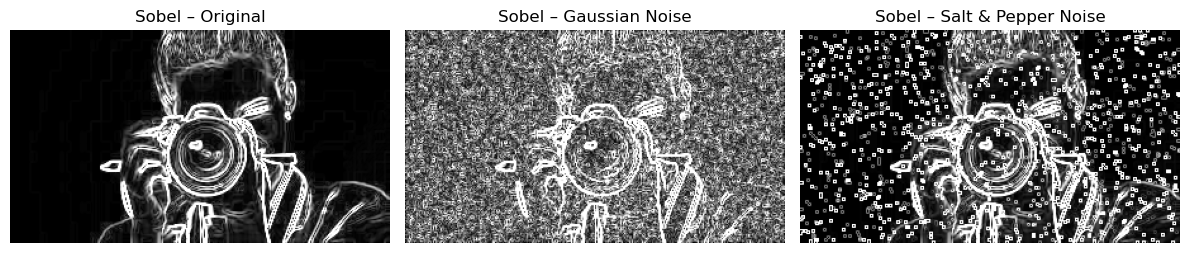

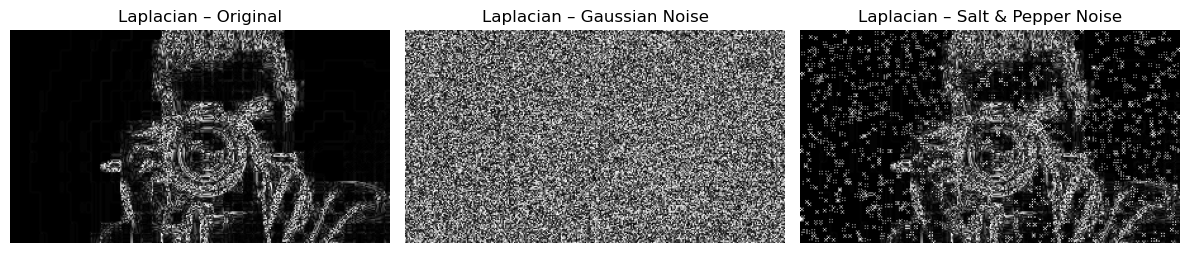

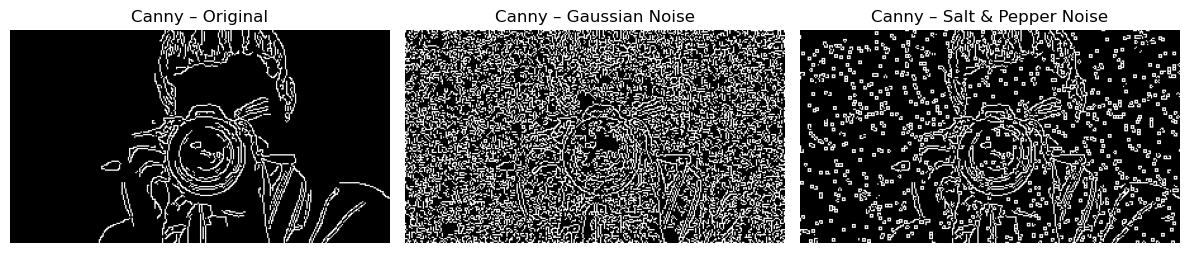

In [33]:
def sobel_edges(img):
    Gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    G_mag = np.sqrt(Gx**2 + Gy**2)
    G_mag = np.uint8(np.clip(G_mag, 0, 255))
    return G_mag

def laplacian_edges(img):
    lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
    lap_abs = np.uint8(np.absolute(lap))
    return lap_abs

def canny_edges(img, low=100, high=200):
    return cv2.Canny(img, low, high)

images = {
    'Original': img_gray,
    'Gaussian Noise': noisy_gaussian,
    'Salt & Pepper Noise': noisy_sp,
}

edge_maps_sobel = {name: sobel_edges(im) for name, im in images.items()}
edge_maps_lap = {name: laplacian_edges(im) for name, im in images.items()}
edge_maps_canny = {name: canny_edges(im) for name, im in images.items()}

# Plot Sobel comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_sobel.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Sobel – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot Laplacian comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_lap.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Laplacian – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot Canny comparisons
plt.figure(figsize=(12, 4))
for i, (name, emap) in enumerate(edge_maps_canny.items(), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(emap, cmap='gray')
    plt.title(f'Canny – {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
def count_edge_pixels(edge_img):
    return int(np.count_nonzero(edge_img))

print("Sobel edge pixel counts:")
for name, emap in edge_maps_sobel.items():
    print(f"  {name}: {count_edge_pixels(emap)}")

print("\nLaplacian edge pixel counts:")
for name, emap in edge_maps_lap.items():
    print(f"  {name}: {count_edge_pixels(emap)}")

print("\nCanny edge pixel counts:")
for name, emap in edge_maps_canny.items():
    print(f"  {name}: {count_edge_pixels(emap)}")

Sobel edge pixel counts:
  Original: 31698
  Gaussian Noise: 50384
  Salt & Pepper Noise: 35650

Laplacian edge pixel counts:
  Original: 30431
  Gaussian Noise: 50024
  Salt & Pepper Noise: 33063

Canny edge pixel counts:
  Original: 3798
  Gaussian Noise: 16725
  Salt & Pepper Noise: 9135


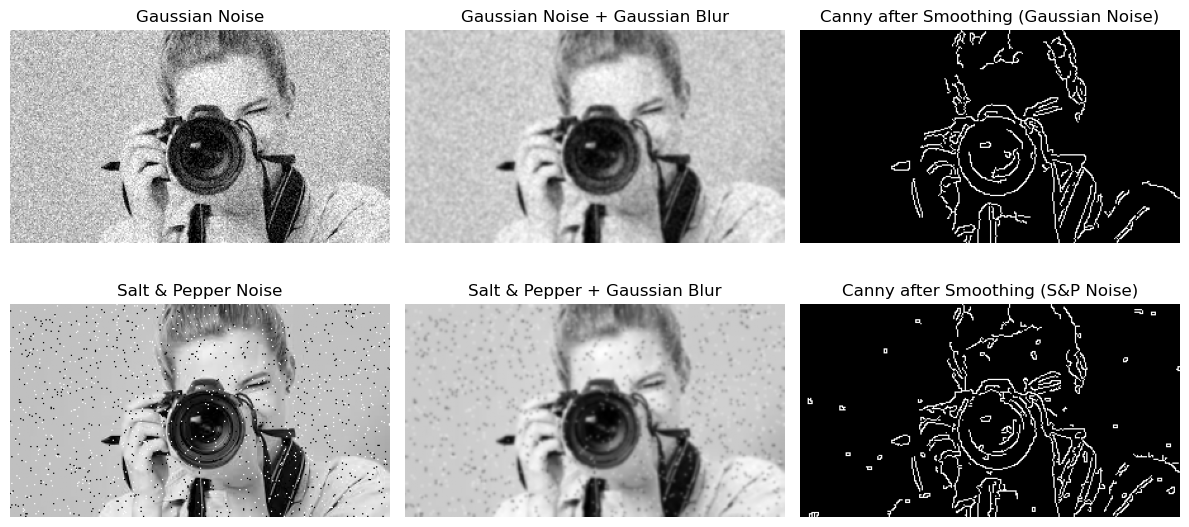

Canny edge pixel counts after smoothing:
  Gaussian noise + blur: 2699
  Salt & pepper + blur: 3237


In [37]:
gaussian_blur_noisy_gauss = cv2.GaussianBlur(noisy_gaussian, (5, 5), 1.0)
gaussian_blur_noisy_sp = cv2.GaussianBlur(noisy_sp, (5, 5), 1.0)

canny_gauss_smooth = canny_edges(gaussian_blur_noisy_gauss)
canny_sp_smooth = canny_edges(gaussian_blur_noisy_sp)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_blur_noisy_gauss, cmap='gray')
plt.title('Gaussian Noise + Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(canny_gauss_smooth, cmap='gray')
plt.title('Canny after Smoothing (Gaussian Noise)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(noisy_sp, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_blur_noisy_sp, cmap='gray')
plt.title('Salt & Pepper + Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(canny_sp_smooth, cmap='gray')
plt.title('Canny after Smoothing (S&P Noise)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Canny edge pixel counts after smoothing:")
print("  Gaussian noise + blur:", count_edge_pixels(canny_gauss_smooth))
print("  Salt & pepper + blur:", count_edge_pixels(canny_sp_smooth))